<a href="https://colab.research.google.com/github/nannaphatsirison/nannaphatsirison/blob/main/Network%20Problem%3A%20Maximize%20Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Maximum Flow Model - Natural Gas company

**Problem Set Up**\\
The image below displays a network of nodes with arcs denoting maximum flow capacities between each node.\\

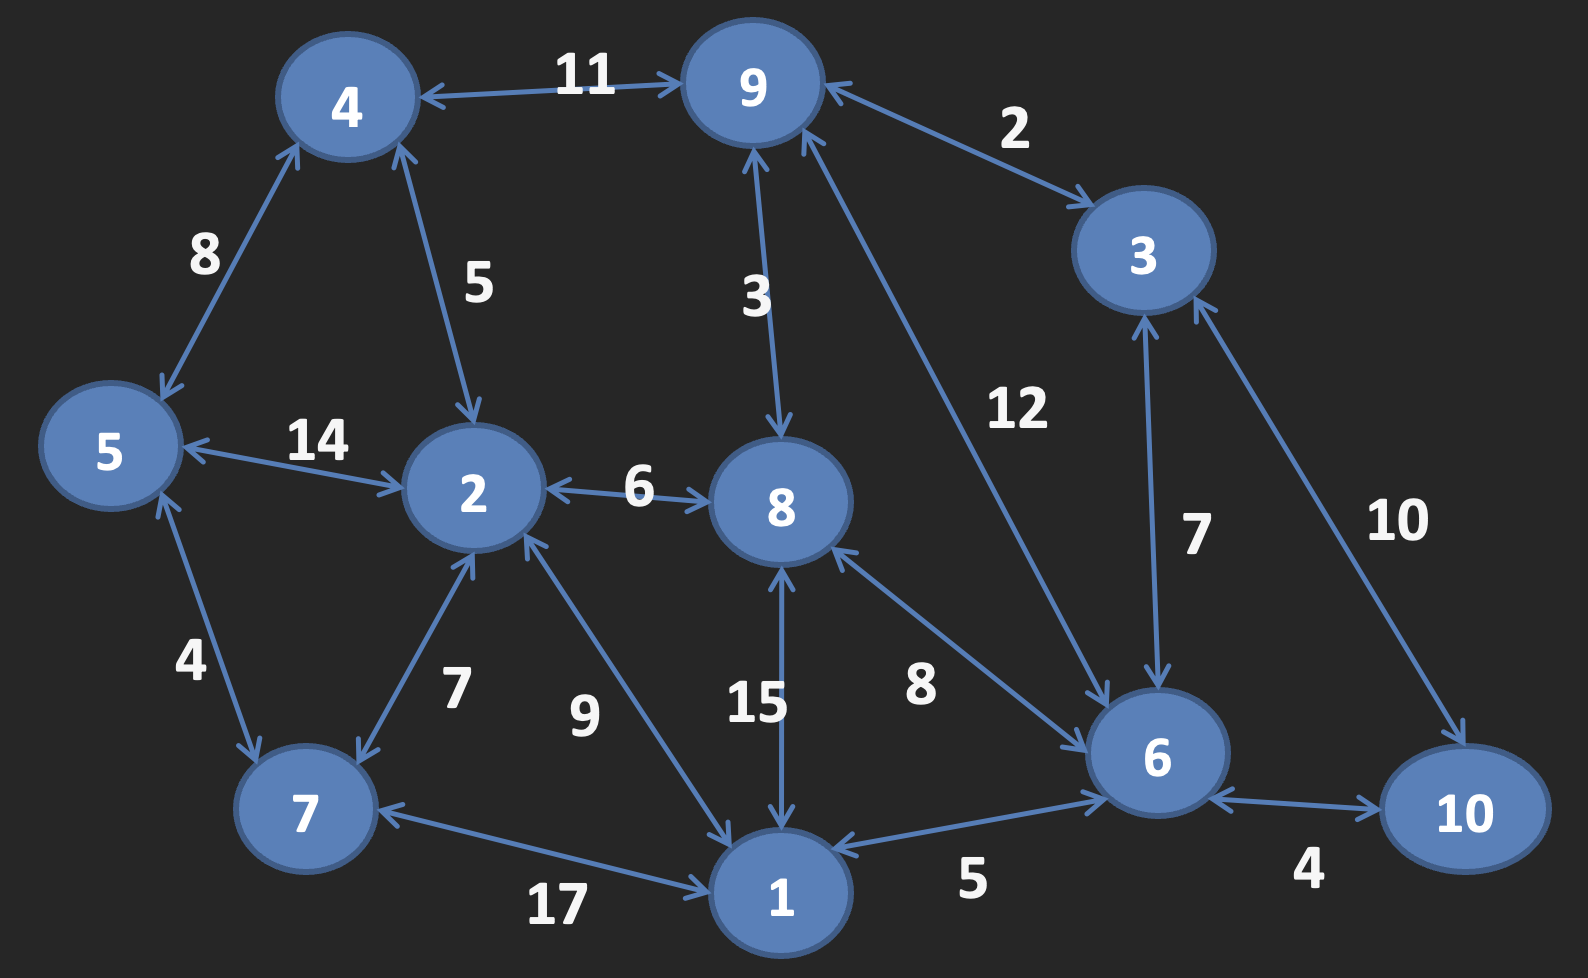
  
**OBJECTIVE**
Find a solution for that optimizes the flow from the origin node to the destination node that the user can define. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/')

In [ ]:
!pip install pyomo
#!apt-get install -y -qq glpk-utils
!apt-get install -y -qq coinor-cbc

     |████████████████████████████████| 9.1 MB 6.1 MB/s 
     |████████████████████████████████| 49 kB 5.1 MB/s 
Selecting previously unselected package coinor-libcoinutils3v5.
(Reading database ... 155219 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.10.14+repack1-1_amd64.deb ...
Unpacking coinor-libcoinutils3v5 (2.10.14+repack1-1) ...
Selecting previously unselected package coinor-libosi1v5.
Preparing to unpack .../1-coinor-libosi1v5_0.107.9+repack1-1_amd64.deb ...
Unpacking coinor-libosi1v5 (0.107.9+repack1-1) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.16.11+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.16.11+repack1-1) ...
Selecting previously unselected package coinor-libcgl1.
Preparing to unpack .../3-coinor-libcgl1_0.59.10+repack1-1_amd64.deb ...
Unpacking coinor-libcgl1 (0.59.10+repack1-1) ...
Selecting previously unselected package coinor-libcbc3.
Preparing to unp

In [ ]:
from pyomo.environ import *
#Import solver
opt=SolverFactory('cbc',executable='/usr/bin/cbc')

In [ ]:
#GENERALIZED FORMAT

In [ ]:
from math import inf 

model2=ConcreteModel()

model2.Nodes=Set(initialize=range(1,11)) 
model2.Arcs=Set(within=model2.Nodes*model2.Nodes, initialize=[(1,2),(1,3),(1,4),(2,5),(3,4),(3,5),(3,6),
                                                              (4,6),(4,10),(5,7),(5,9),(6,7),(6,8),(6,9),
                                                              (7,8),(7,9),(8,9),(8,10),(9,10),(2,1),(3,1),(4,1),(4,3),(5,2),(5,3),(6,3),(6,4),(10,4),(7,5),(9,5),
                                                              (7,6),(8,6),(10,6),(8,7),(9,7),(9,8),(10,8),(10,9)])

model2.Arcs.pprint()

Arcs : Size=1, Index=None, Ordered=Insertion
    Key  : Dimen : Domain      : Size : Members
    None :     2 : Arcs_domain :   38 : {(1, 2), (1, 3), (1, 4), (2, 5), (3, 4), (3, 5), (3, 6), (4, 6), (4, 10), (5, 7), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9), (8, 10), (9, 10), (2, 1), (3, 1), (4, 1), (4, 3), (5, 2), (5, 3), (6, 3), (6, 4), (10, 4), (7, 5), (9, 5), (7, 6), (8, 6), (10, 6), (8, 7), (9, 7), (9, 8), (10, 8), (10, 9)}


In [ ]:
#Add parameter
model2.capacity=Param(model2.Arcs,initialize={
    (1,2):5,
    (1,3):12,
    (1,4):8,
    (2,5):6,
    (3,4):2,
    (3,5):4,
    (3,6):5,
    (4,6):9,
    (4,10):2,
    (5,7):6,
    (5,9):5,
    (6,7):3,
    (6,8):6,
    (6,9):8,
    (7,8):5,
    (7,9):7,
    (8,9):5,
    (8,10):7,
    (9,10):4,
    (2,1):0,
    (3,1):0,
    (4,1):0,
    (5,2):3,
    (4,3):0,
    (5,3):3,
    (6,3):4,
    (6,4):5,
    (10,4):0,
    (7,5):0,
    (9,5):2,
    (7,6):4,
    (8,6):3,
    (10,6):0,
    (8,7):2,
    (9,7):3,
    (9,8):1,
    (10,8):0,
    (10,9):0})

In [ ]:
#Adding objective function

model2.x=Var(model2.Arcs,domain=NonNegativeReals)
model2.first = 3
model2.last = 5
def max_flow(model2):
    return sum(model2.x[i,j] for (i,j) in model2.Arcs if i == model2.first)
model2.maxflow=Objective(rule=max_flow, sense=maximize)

print(model2.maxflow.expr)

    'pyomo.core.base.var.IndexedVar'>) on block unknown with a new Component
    (type=<class 'pyomo.core.base.var.IndexedVar'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.objective.ScalarObjective'>) on block unknown with a new
    Component (type=<class 'pyomo.core.base.objective.ScalarObjective'>). This
    is usually indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
x[3,4] + x[3,5] + x[3,6] + x[3,1]


In [ ]:
def flow_rule(model2, n):
    inFlow = sum(model2.x[i,j] for (i,j) in model2.Arcs if j==n)
    outFlow = sum(model2.x[j,i] for (j,i) in model2.Arcs if j==n)
    return inFlow == outFlow #trans-shipment constraint
model2.flow = Constraint(model2.Nodes, rule=flow_rule)

for n in model2.Nodes:
  print(model2.flow[n].expr)

    'pyomo.core.base.constraint.IndexedConstraint'>) on block unknown with a
    new Component (type=<class
    'pyomo.core.base.constraint.IndexedConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
x[2,1] + x[3,1] + x[4,1]  ==  x[1,2] + x[1,3] + x[1,4]
x[1,2] + x[5,2]  ==  x[2,5] + x[2,1]
x[1,3] + x[4,3] + x[5,3] + x[6,3]  ==  x[3,4] + x[3,5] + x[3,6] + x[3,1]
x[1,4] + x[3,4] + x[6,4] + x[10,4]  ==  x[4,6] + x[4,10] + x[4,1] + x[4,3]
x[2,5] + x[3,5] + x[7,5] + x[9,5]  ==  x[5,7] + x[5,9] + x[5,2] + x[5,3]
x[3,6] + x[4,6] + x[7,6] + x[8,6] + x[10,6]  ==  x[6,7] + x[6,8] + x[6,9] + x[6,3] + x[6,4]
x[5,7] + x[6,7] + x[8,7] + x[9,7]  ==  x[7,8] + x[7,9] + x[7,5] + x[7,6]
x[6,8] + x[7,8] + x[9,8] + x[10,8]  ==  x[8,9] + x[8,10] + x[8,6] + x[8,7]
x[5,9] + x[6,9] + x[7,9] + x[8,9] + x[10,9]  ==  x[9,10] + x[9,5] + x[9,7] + x[9,8]
x[4,10] + x[8,10] + x[9,10]  ==  x[10,4] + x[10,6] + x[10,8] + x[10,

In [ ]:
def max_capacity(model2, i,j):
  return model2.x[i,j] <= model2.capacity[i,j]
model2.capacityconstraint = Constraint(model2.Arcs, rule = max_capacity)

for (i,j) in model2.Arcs:
  print (model2.capacityconstraint[i,j].expr)


    (type=<class 'pyomo.core.base.constraint.IndexedConstraint'>) on block
    unknown with a new Component (type=<class
    'pyomo.core.base.constraint.IndexedConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
x[1,2]  <=  5
x[1,3]  <=  12
x[1,4]  <=  8
x[2,5]  <=  6
x[3,4]  <=  2
x[3,5]  <=  4
x[3,6]  <=  5
x[4,6]  <=  9
x[4,10]  <=  2
x[5,7]  <=  6
x[5,9]  <=  5
x[6,7]  <=  3
x[6,8]  <=  6
x[6,9]  <=  8
x[7,8]  <=  5
x[7,9]  <=  7
x[8,9]  <=  5
x[8,10]  <=  7
x[9,10]  <=  4
x[2,1]  <=  0
x[3,1]  <=  0
x[4,1]  <=  0
x[4,3]  <=  0
x[5,2]  <=  3
x[5,3]  <=  3
x[6,3]  <=  4
x[6,4]  <=  5
x[10,4]  <=  0
x[7,5]  <=  0
x[9,5]  <=  2
x[7,6]  <=  4
x[8,6]  <=  3
x[10,6]  <=  0
x[8,7]  <=  2
x[9,7]  <=  3
x[9,8]  <=  1
x[10,8]  <=  0
x[10,9]  <=  0


In [ ]:
def orig_dest(model2):
    orig  = sum(model2.x[i,j] for (i,j) in model2.Arcs if i == model2.first)
    dest = sum(model2.x[i,j] for (i,j) in model2.Arcs if j == model2.last)
    return orig == dest
model2.origdest = Constraint(rule=orig_dest)

    'pyomo.core.base.constraint.ScalarConstraint'>) on block unknown with a
    new Component (type=<class
    'pyomo.core.base.constraint.AbstractScalarConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().


In [ ]:
opt.solve(model2)

#Print results
print("Max Flow =",model2.maxflow())
print("Decision Variables")
for a in model2.Arcs:
    print(model2.x[a],model2.x[a].value)

Max Flow = 7.0
Decision Variables
x[1,2] 0.0
x[1,3] 0.0
x[1,4] 0.0
x[2,5] 3.0
x[3,4] 0.0
x[3,5] 3.0
x[3,6] 4.0
x[4,6] -0.0
x[4,10] 0.0
x[5,7] 0.0
x[5,9] 1.0
x[6,7] 0.0
x[6,8] 0.0
x[6,9] 0.0
x[7,8] 0.0
x[7,9] 0.0
x[8,9] 0.0
x[8,10] 0.0
x[9,10] 0.0
x[2,1] 0.0
x[3,1] 0.0
x[4,1] 0.0
x[4,3] 0.0
x[5,2] 3.0
x[5,3] 3.0
x[6,3] 4.0
x[6,4] 0.0
x[10,4] 0.0
x[7,5] 0.0
x[9,5] 1.0
x[7,6] 0.0
x[8,6] 0.0
x[10,6] 0.0
x[8,7] 0.0
x[9,7] 0.0
x[9,8] 0.0
x[10,8] 0.0
x[10,9] 0.0
